In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.8)

In [2]:
result_dir = 'results'

In [7]:
def create_plots(file):

    df = pd.read_csv(os.path.join(result_dir, file))


    # Create heatmap using seaborn
    subjects = ['S1', 'S2', 'S3', 'S4', 'S5']
    plt.figure(figsize=(12, 6))
    heatmap = sns.heatmap(df, yticklabels = subjects, annot=True, cmap="YlGnBu")
    plt.xticks(rotation=45)

    labels = heatmap.get_xticklabels()
    heatmap.set_xticklabels(labels, ha='right')

    plt.title("Binary Finger Classification")

    plt.tight_layout()
    plt.savefig(f'plots/{file.split(".")[0]}_heatmap.png')


        
    # Create box plot using seaborn
    plt.figure(figsize=(12, 6))
    plt.title("Classifier Results Mean(Std) for each Subject", y=1.15)
    ax = sns.boxplot(data=df.T)
    ax.set_ylim(40, 100)
    plt.xlabel("Subjects")
    plt.ylabel("Percentage")
    ax.set_xticklabels(subjects)

    mean_fingers = df.mean(axis=1)
    std_fingers = df.std(axis=1)

    # Add mean and standard deviation values as annotations
    for i, (mean, std) in enumerate(zip(mean_fingers, std_fingers)):
        plt.text(i - 0.3, 102, f"{mean:.1f}({std:.1f})", fontsize=20)
    
    plt.tight_layout()
    plt.savefig(f'plots/{file.split(".")[0]}_box.png')


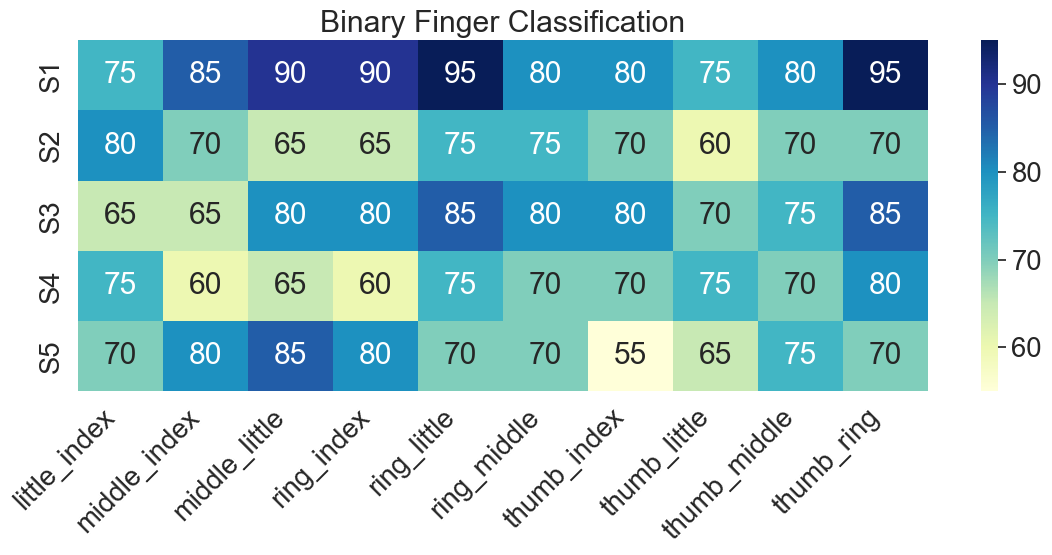

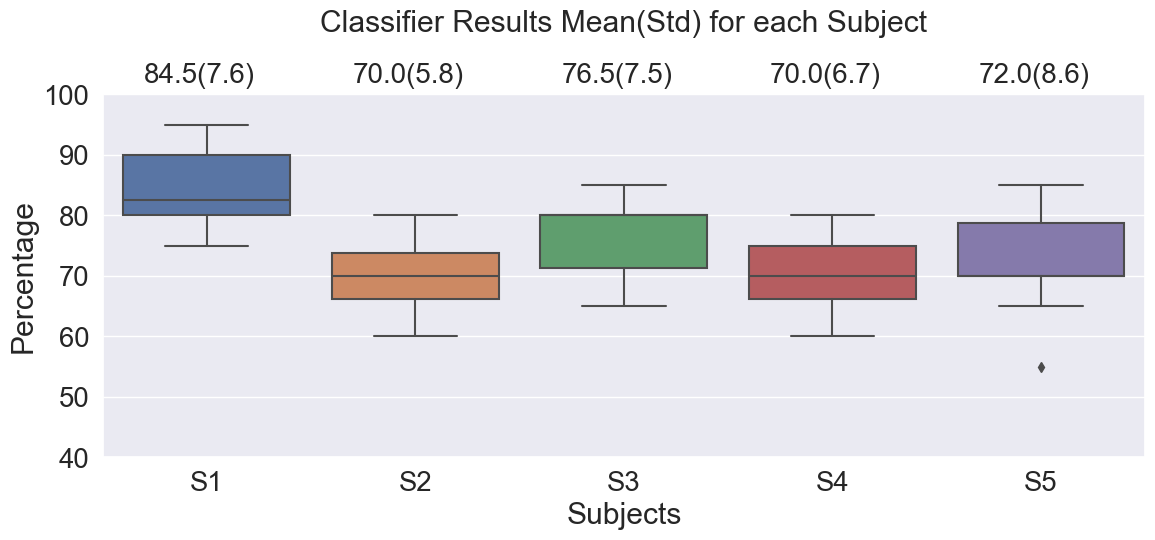

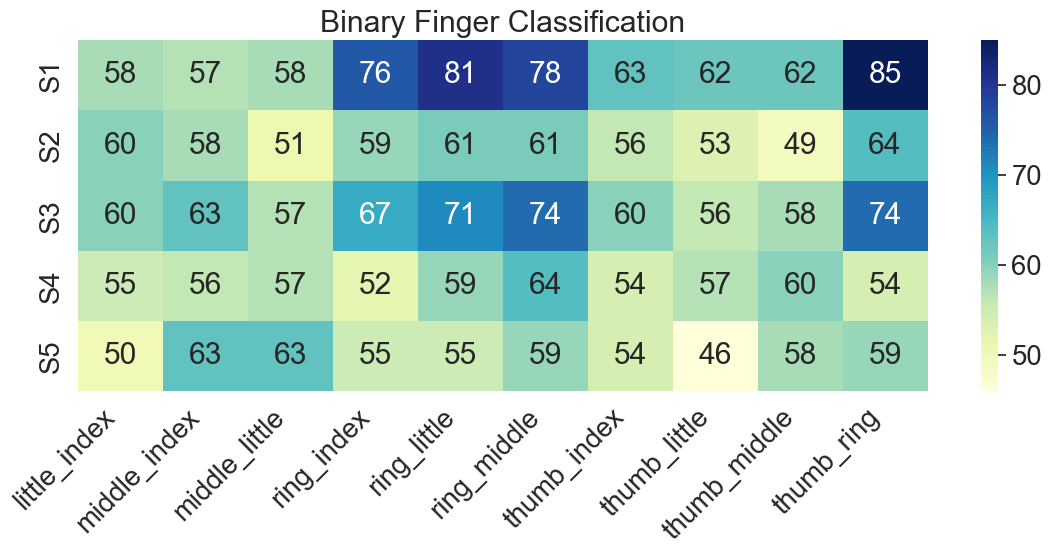

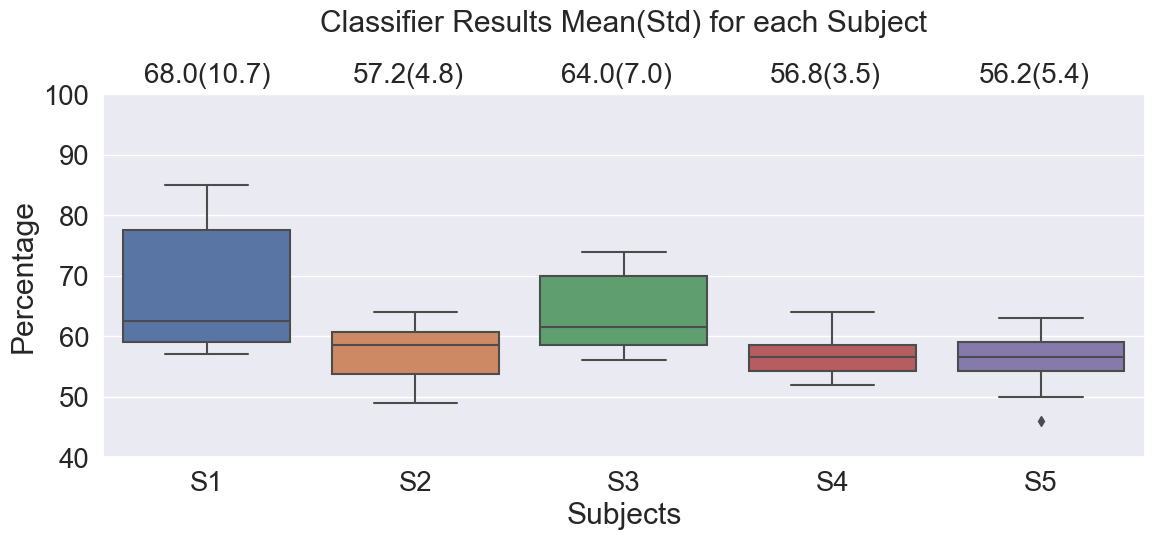

In [8]:
for file in os.listdir(result_dir):
    create_plots(file)